In [1]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Step 1:  Read in the `stock_data.csv` file and create a DataFrame.

In [2]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_stocks = pd.read_csv("Resources/stock_data.csv", index_col="Ticker")

# Review the DataFrame
df_stocks.head()

,Company_Name,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,MeanPercentReturn,Sector
Ticker,,,,,,,,
AA,Alcoa,16.515833,16.950000,16.039167,16.549167,1.420218e+08,0.181467,Industrials
AXP,American Express,44.602500,45.683333,43.615833,44.821667,3.849082e+07,0.401822,Financials
BA,Boeing,70.768333,72.375000,69.235000,71.258333,2.614144e+07,0.589636,Industrials
BAC,Bank of America,14.302500,14.660000,13.867500,14.270000,8.283930e+08,0.070159,Financials
CAT,Caterpillar,99.521667,101.933333,97.073333,100.364167,3.093352e+07,0.439549,Industrials


In [3]:
# Get the shape of the DataFrame
df_stocks.shape

(30, 8)

In [4]:
# Get the information on the DataFrame
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, AA to XOM
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Name       30 non-null     object 
 1   MeanOpen           30 non-null     float64
 2   MeanHigh           30 non-null     float64
 3   MeanLow            30 non-null     float64
 4   MeanClose          30 non-null     float64
 5   MeanVolume         30 non-null     float64
 6   MeanPercentReturn  30 non-null     float64
 7   Sector             30 non-null     object 
dtypes: float64(6), object(2)
memory usage: 2.1+ KB


### Step 2: Scale the `df_stocks` DataFrame and create a new DataFrame that contains the scaled data. 

In [5]:
# Use the standard scaler, fit_transform to scale the numerical columns. 
stock_data_scaled = StandardScaler().fit_transform(df_stocks[["MeanOpen", "MeanHigh", "MeanLow", "MeanClose", "MeanVolume", "MeanPercentReturn"]])

In [6]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step
df_stocks_scaled = pd.DataFrame(
    stock_data_scaled,
    columns=["MeanOpen", "MeanHigh", "MeanLow", "MeanClose", "MeanVolume", "MeanPercentReturn"]
)

# Create a Ticker column in the df_stocks_scaled DataFrame
# using the index of the original df_stocks DataFrame
df_stocks_scaled["Ticker"] = df_stocks.index

# Set the newly created Ticker column as index of the df_stocks_scaled DataFrame
df_stocks_scaled = df_stocks_scaled.set_index("Ticker")

# Review the DataFrame
df_stocks_scaled.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,MeanPercentReturn
Ticker,,,,,,
AA,-1.158886,-1.153217,-1.159624,-1.153417,0.103184,-1.610917
AXP,-0.261157,-0.254393,-0.265739,-0.258185,-0.539199,-0.919042
BA,0.575177,0.580564,0.564695,0.578916,-0.615824,-0.329342
BAC,-1.229631,-1.224851,-1.230018,-1.225585,4.361945,-1.960402
CAT,1.494216,1.505195,1.467062,1.500534,-0.586091,-0.800586


In [7]:
# Encode the Sector column
sector_encoded_df = pd.get_dummies(df_stocks["Sector"])

# Review the DataFrame
sector_encoded_df.head()

,Communication,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology
Ticker,,,,,,,,
AA,False,False,False,False,False,False,True,False
AXP,False,False,False,False,True,False,False,False
BA,False,False,False,False,False,False,True,False
BAC,False,False,False,False,True,False,False,False
CAT,False,False,False,False,False,False,True,False


In [8]:
# Concatenate the `Sector` encoded DataFrame with the scaled data DataFrame
scaled_encoded_stocks = pd.concat([df_stocks_scaled, sector_encoded_df], axis=1)

# Display the sample data
scaled_encoded_stocks.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,MeanPercentReturn,Communication,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology
Ticker,,,,,,,,,,,,,,
AA,-1.158886,-1.153217,-1.159624,-1.153417,0.103184,-1.610917,False,False,False,False,False,False,True,False
AXP,-0.261157,-0.254393,-0.265739,-0.258185,-0.539199,-0.919042,False,False,False,False,True,False,False,False
BA,0.575177,0.580564,0.564695,0.578916,-0.615824,-0.329342,False,False,False,False,False,False,True,False
BAC,-1.229631,-1.224851,-1.230018,-1.225585,4.361945,-1.960402,False,False,False,False,True,False,False,False
CAT,1.494216,1.505195,1.467062,1.500534,-0.586091,-0.800586,False,False,False,False,False,False,True,False


### Step 3: Initialize the K-means model with three clusters and then fit the `df_stocks_scaled` DataFrame to the model.

In [9]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

# Fit the model for the scaled_encoded_stocks DataFrame
model.fit(scaled_encoded_stocks)

KMeans(n_clusters=3, n_init='auto', random_state=1)

### Step 4. Predict the clusters and then create a new DataFrame with the predicted clusters.

In [10]:
# Create a copy of the scaled_encoded_stocks DataFrame and name it as stocks_scaled_predictions
stocks_scaled_predictions = scaled_encoded_stocks.copy()

# Predict the model segments (clusters)
stock_clusters = model.predict(stocks_scaled_predictions)

# Create a new column in the DataFrame with the predicted clusters
stocks_scaled_predictions["StockCluster"] = stock_clusters

# Review the DataFrame
stocks_scaled_predictions.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,MeanPercentReturn,Communication,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,StockCluster
Ticker,,,,,,,,,,,,,,,
AA,-1.158886,-1.153217,-1.159624,-1.153417,0.103184,-1.610917,False,False,False,False,False,False,True,False,1
AXP,-0.261157,-0.254393,-0.265739,-0.258185,-0.539199,-0.919042,False,False,False,False,True,False,False,False,2
BA,0.575177,0.580564,0.564695,0.578916,-0.615824,-0.329342,False,False,False,False,False,False,True,False,2
BAC,-1.229631,-1.224851,-1.230018,-1.225585,4.361945,-1.960402,False,False,False,False,True,False,False,False,1
CAT,1.494216,1.505195,1.467062,1.500534,-0.586091,-0.800586,False,False,False,False,False,False,True,False,2


### Step 5: Create a scatter plot to visualize the "StockCluster" using  "MeanOpen" as the x-variable and "MeanPercentReturn" as the y-variable.  

<Axes: xlabel='MeanOpen', ylabel='MeanPercentReturn'>

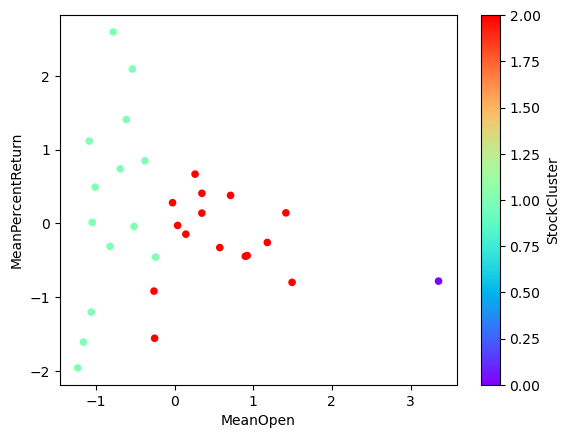

In [21]:
# Create a scatter plot with x="MeanOpen" and y="MeanPercentReturn"
stocks_scaled_predictions.plot.scatter(
    x="MeanOpen",
    y="MeanPercentReturn",
    c="StockCluster",
    colormap='rainbow')

### Step 6: Reduce the number of features to two principal components on the `df_stocks_scaled` DataFrame, and  calculate the explained variance ratio that results from the PCA data.

In [12]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

In [13]:
# Fit the scaled_encoded_stocks data to the PCA
stocks_pca_data = pca.fit_transform(scaled_encoded_stocks)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
stocks_pca_data[:5]

array([[-2.12035558,  1.15101959],
       [-0.31116245,  0.52602554],
       [ 1.31615443,  0.12678991],
       [-3.56363597,  3.65172313],
       [ 3.07649932,  0.73306712]])

In [14]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.63692415, 0.19097545])

### Step 7: Use the calculate PCA DataFrame in Step 6 to create a new DataFrame called, `df_stocks_pca`, then add an additional column to the `df_stocks_pca` DataFrame that contains the tickers from the original `df_stocks` DataFrame.

In [15]:
# Creating a DataFrame with the PCA data
df_stocks_pca = pd.DataFrame(stocks_pca_data, columns=["PCA1", "PCA2"])

# Copy the tickers names from the original data
df_stocks_pca["Ticker"] = df_stocks.index

# Set the Ticker column as index
df_stocks_pca = df_stocks_pca.set_index("Ticker")

# Review the DataFrame
df_stocks_pca.head()

,PCA1,PCA2
Ticker,,
AA,-2.120356,1.151020
AXP,-0.311162,0.526026
BA,1.316154,0.126790
BAC,-3.563636,3.651723
CAT,3.076499,0.733067


### Step 8: Rerun the K-means algorithm on the `df_stocks_pca` DataFrame and create a scatter plot using the  "StockCluster" and the two principal components for the x- and y-axes. Be sure to style and format your plot.

In [16]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_stocks_pca)

# Predict the model segments (clusters)
stock_clusters = model.predict(df_stocks_pca)

In [17]:
# Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_stocks_pca_predictions = df_stocks_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
df_stocks_pca_predictions["StockCluster"] = stock_clusters

# Review the DataFrame
df_stocks_pca_predictions.head()

,PCA1,PCA2,StockCluster
Ticker,,,
AA,-2.120356,1.151020,1
AXP,-0.311162,0.526026,1
BA,1.316154,0.126790,2
BAC,-3.563636,3.651723,1
CAT,3.076499,0.733067,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

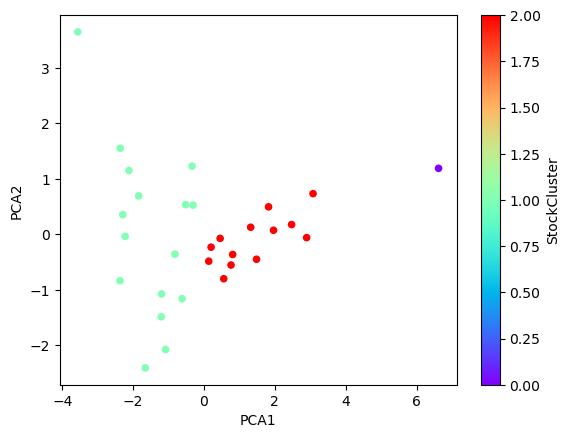

In [22]:
# Create the scatter plot with x="PCA1" and y="PCA2"
df_stocks_pca_predictions.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="StockCluster",
    colormap='rainbow')

**Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

**Answer:** We can conclude that using less features we can more clearly identify three clusters.

### Step 9. Determine which features have the strongest influence on each componen, and plot the most influencial features for each component.

In [19]:
# Use the columns from the scaled and encoded DataFrame in step 2.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=scaled_encoded_stocks.columns)
pca_component_weights

,PCA1,PCA2
MeanOpen,0.475365,0.055355
MeanHigh,0.475310,0.058332
MeanLow,0.475316,0.054146
MeanClose,0.475312,0.056770
MeanVolume,-0.299926,0.508430
MeanPercentReturn,-0.055032,-0.817351
Communication,-0.010730,-0.142048
Consumer Discretionary,0.005024,-0.020594
Consumer Staples,0.004338,-0.056752
Energy,0.035981,0.011055


### Which features have the strongest influence on each component? 
--- 
**Answer:** 
- "MeanOpen", "MeanHigh", "MeanLow", and "MeanClose" have the strongest positive influence on PCA1. 
- "MeanVolume" has the strongest positive influence on PCA2.

### Step 10: Create a scatterplot of the most influential features for each principal component and stock cluster.

<Axes: xlabel='MeanOpen', ylabel='MeanVolume'>

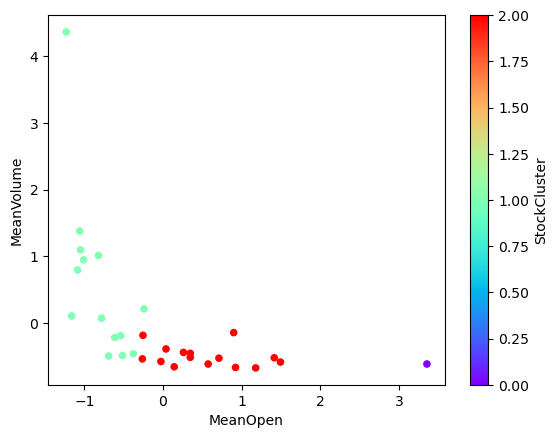

In [23]:
# Plot the features that have the strongest influence on each component. 
stocks_scaled_predictions.plot.scatter(
    x="MeanOpen",
    y="MeanVolume",
    c="StockCluster",
    colormap='rainbow')

### Step 11: What is the difference between the segmentation results of the PCA DataFrame and most influential features for each component? 

**Answer:** It appears that the most influential features for each component are; "MeanHigh" and "MeanVolume", however, plotting these features does not yield similar results as plotting each principal component. Suggesting that more than one feature is influencing one or principal components. 